In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

100% 2.70G/2.70G [02:15<00:00, 25.1MB/s]
100% 2.70G/2.70G [02:15<00:00, 21.4MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('hello.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import cv2
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
print("numpy", np.__version__)
print("OpenCV ", cv2.__version__)
print("tensorflow", tf.__version__)

numpy 1.23.5
OpenCV  4.8.0
tensorflow 2.15.0


In [7]:
IMAGE_SIZE = 224
BATCH_SIZE = 32
CHANNELS = 3
INPUT_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
EPOCH = 8

In [8]:
os.listdir('new-plant-diseases-dataset')

['New Plant Diseases Dataset(Augmented)']

In [10]:
base_dir = "new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)"
train_dir = os.path.join(base_dir,"train")
valid_dir = os.path.join(base_dir,"valid")
diseases = os.listdir(train_dir)
print(diseases)

['Tomato___Target_Spot', 'Potato___Late_blight', 'Grape___healthy', 'Tomato___Early_blight', 'Squash___Powdery_mildew', 'Tomato___Septoria_leaf_spot', 'Potato___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Apple___Black_rot', 'Grape___Esca_(Black_Measles)', 'Corn_(maize)___healthy', 'Pepper,_bell___Bacterial_spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Corn_(maize)___Common_rust_', 'Soybean___healthy', 'Tomato___healthy', 'Cherry_(including_sour)___healthy', 'Potato___Early_blight', 'Corn_(maize)___Northern_Leaf_Blight', 'Strawberry___Leaf_scorch', 'Tomato___Leaf_Mold', 'Tomato___Tomato_mosaic_virus', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Peach___healthy', 'Strawberry___healthy', 'Apple___Apple_scab', 'Grape___Black_rot', 'Blueberry___healthy', 'Tomato___Bacterial_spot', 'Peach___Bacterial_spot', 'Raspberry___healthy', 'Cherry_(including_sour)___Powdery_mildew

In [11]:
print(len(diseases))

38


In [12]:
tf.get_logger().setLevel('WARNING')

In [13]:
train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale = 1/255.0,
                                                             shear_range = 0.2,
                                                             zoom_range = 0.2,
                                                             width_shift_range = 0.2,
                                                             height_shift_range = 0.2,
                                                             fill_mode="nearest")



validation_datagen =  keras.preprocessing.image.ImageDataGenerator(rescale = 1/255.0)

In [14]:
train_dir

'new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/train'

In [15]:
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical",

)

val_data = validation_datagen.flow_from_directory(
    valid_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
)

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [16]:
print("Number of batches in training generator:", len(train_data))
print("Number of batches in validation generator:", len(val_data))

Number of batches in training generator: 2197
Number of batches in validation generator: 550


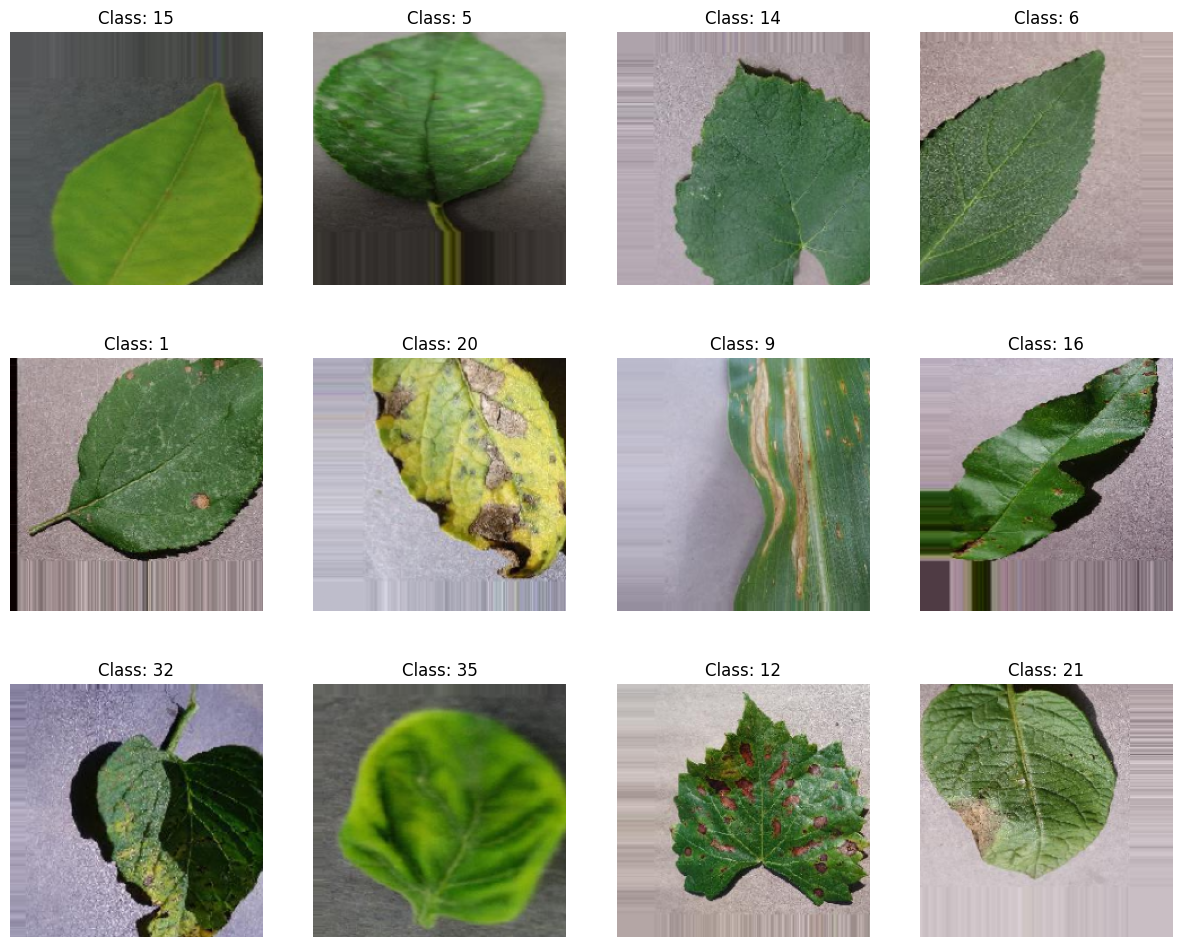

In [19]:
plt.figure(figsize=(15, 12))
for i in range(12):
    ax = plt.subplot(3, 4, i + 1)
    plt.imshow(images[i])
    plt.title(f"Class: {labels[i].argmax()}")
    plt.axis("off")

plt.show()

In [20]:
diseases = os.listdir(train_dir)
nums = {}
for disease in diseases:
    nums[disease] = len(os.listdir(train_dir + '/' + disease))
img_per_class = pd.DataFrame(nums.values(), index=nums.keys(), columns=["no. of images"])
img_per_class

,no. of images
Tomato___Target_Spot,1827
Potato___Late_blight,1939
Grape___healthy,1692
Tomato___Early_blight,1920
Squash___Powdery_mildew,1736
Tomato___Septoria_leaf_spot,1745
Potato___healthy,1824
Orange___Haunglongbing_(Citrus_greening),2010
Apple___Cedar_apple_rust,1760
Apple___healthy,2008


In [22]:
categories = list(train_data.class_indices.keys())
print(train_data.class_indices)

{'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Blueberry___healthy': 4, 'Cherry_(including_sour)___Powdery_mildew': 5, 'Cherry_(including_sour)___healthy': 6, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7, 'Corn_(maize)___Common_rust_': 8, 'Corn_(maize)___Northern_Leaf_Blight': 9, 'Corn_(maize)___healthy': 10, 'Grape___Black_rot': 11, 'Grape___Esca_(Black_Measles)': 12, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13, 'Grape___healthy': 14, 'Orange___Haunglongbing_(Citrus_greening)': 15, 'Peach___Bacterial_spot': 16, 'Peach___healthy': 17, 'Pepper,_bell___Bacterial_spot': 18, 'Pepper,_bell___healthy': 19, 'Potato___Early_blight': 20, 'Potato___Late_blight': 21, 'Potato___healthy': 22, 'Raspberry___healthy': 23, 'Soybean___healthy': 24, 'Squash___Powdery_mildew': 25, 'Strawberry___Leaf_scorch': 26, 'Strawberry___healthy': 27, 'Tomato___Bacterial_spot': 28, 'Tomato___Early_blight': 29, 'Tomato___Late_blight': 30, 'Tomato

In [24]:
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)

In [25]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [26]:
gpus = tf.config.list_logical_devices('GPU')
strategy = tf.distribute.MirroredStrategy(gpus)
print("Number of devices: {}".format(strategy.num_replicas_in_sync))# Define strategy

Number of devices: 1


In [27]:
with strategy.scope():
    base_model = tf.keras.applications.MobileNet(weights = "imagenet",
                                             include_top = False,
                                             input_shape = INPUT_SHAPE)

    base_model.trainable = False
    inputs = keras.Input(shape = INPUT_SHAPE)

    x = base_model(inputs, training = False)
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dropout(0.2)(x)
    x = tf.keras.layers.Dense(len(categories),
                              activation="softmax")(x)

    model = keras.Model(inputs = inputs,
                        outputs = x,
                        name="LeafDisease_MobileNet")
    optimizer = tf.keras.optimizers.Adam()

    model.compile(optimizer = optimizer,
                  loss = tf.keras.losses.CategoricalCrossentropy(),
                  metrics=[keras.metrics.CategoricalAccuracy(),
                           'accuracy'])
    history = model.fit(train_data,
                    validation_data=val_data,
                    epochs=EPOCH,
                    steps_per_epoch=150,
                    validation_steps=100,
                       callbacks=[early_stopping_callback])

17225924/17225924 [==============================] - 2s 0us/step
Epoch 1/8
150/150 [==============================] - 100s 615ms/step - loss: 1.9663 - categorical_accuracy: 0.4897 - accuracy: 0.4897 - val_loss: 0.8131 - val_categorical_accuracy: 0.7947 - val_accuracy: 0.7947
Epoch 2/8
150/150 [==============================] - 91s 603ms/step - loss: 0.7428 - categorical_accuracy: 0.8008 - accuracy: 0.8008 - val_loss: 0.5429 - val_categorical_accuracy: 0.8516 - val_accuracy: 0.8516
Epoch 3/8
150/150 [==============================] - 81s 539ms/step - loss: 0.5802 - categorical_accuracy: 0.8358 - accuracy: 0.8358 - val_loss: 0.3948 - val_categorical_accuracy: 0.8816 - val_accuracy: 0.8816
Epoch 4/8
150/150 [==============================] - 84s 561ms/step - loss: 0.4664 - categorical_accuracy: 0.8623 - accuracy: 0.8623 - val_loss: 0.3387 - val_categorical_accuracy: 0.8984 - val_accuracy: 0.8984
Epoch 5/8
150/150 [==============================] - 81s 542ms/step - loss: 0.4014 - categoric

In [28]:
model.save('leafclassifier.keras')
model.save('your_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [29]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
tflite_model_path = 'your_model.tflite'
with open(tflite_model_path, 'wb') as f:
    f.write(tflite_model)

print(f"TFLite model saved to: {tflite_model_path}")

TFLite model saved to: your_model.tflite
